In [49]:
# 1️⃣ Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [50]:
# # 2️⃣ Load the Dataset
# # ============================================================

# df1 = pd.read_csv("Algerian_forest_fires_dataset_Cleaned.csv")

# print("✅ Dataset Loaded Successfully!")
# print("Shape:", df1.shape)
# print(df1.head())

# 2️⃣ Load the Dataset
# ============================================================

df1 = pd.read_csv("Algerian_forest_fires_cleaned_dataset_updated.csv")

print("✅ Dataset Loaded Successfully!")
print("Shape:", df1.shape)
print(df1.head())

✅ Dataset Loaded Successfully!
Shape: (243, 15)
   day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI      Classes  Region  
0  0.5  not fire          0  
1  0.4  not fire          0  
2  0.1  not fire          0  
3  0.0  not fire          0  
4  0.5  not fire          0  


In [51]:
df1.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [52]:
df1.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [53]:
df=df1.drop(['day','month','year'],axis=1)

In [54]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    object 
 11  Region       243 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 22.9+ KB


In [56]:
df.Classes.value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [57]:
df.Classes=df.Classes.str.strip()

In [58]:
df.Classes.value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [59]:
# encode not fire to 0 and fire to 1
df['Classes']=np.where(df['Classes']=='not fire',0,1)

In [60]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


# ============================================================
# 3️⃣ Separate Features (X) and Target (y)
# ============================================================

In [61]:
# Target column — replace 'FWI' if your target has another name
# independent and dependent feature

X = df.drop('FWI', axis=1)
y = df['FWI']



In [62]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [63]:
# y.head() # fwi ko output feature bna diye h 
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [64]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

print("\nTraining Set:", X_train.shape)
print("Test Set:", X_test.shape)


Training Set: (182, 11)
Test Set: (61, 11)


In [65]:
# feature selection based on corr
X_train.corr()
# iske output ko corr matrix bolte h

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


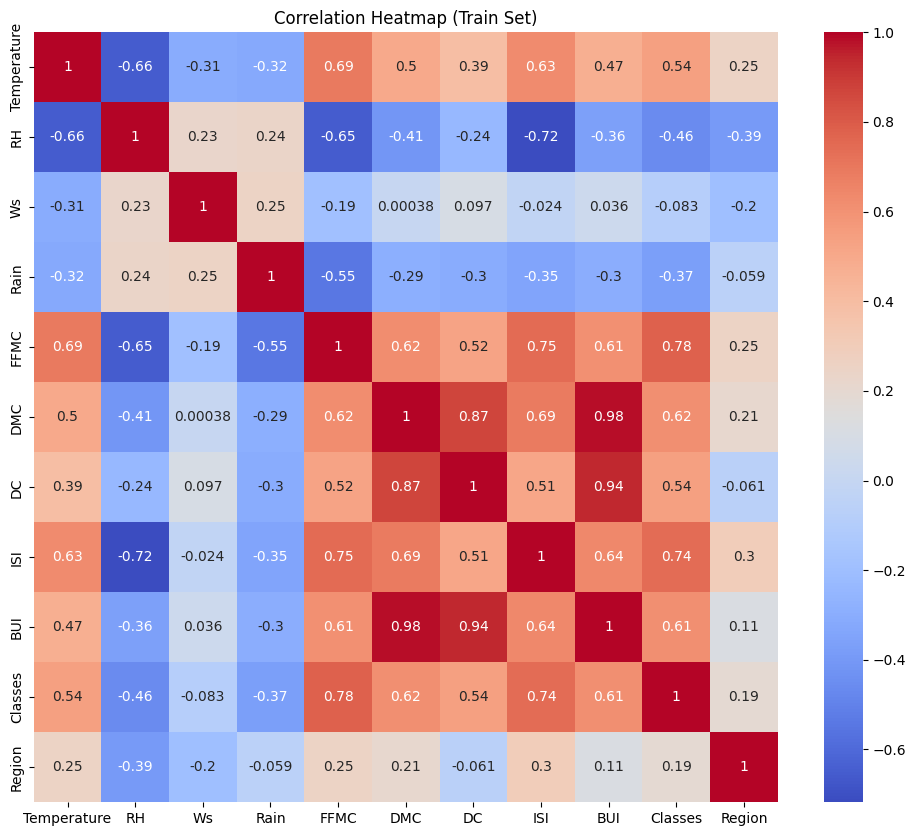

In [66]:
# ============================================================
# 4️⃣ Check for Multicollinearity (Correlation)
# ============================================================

plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Train Set)")
plt.show()


In [67]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


In [68]:
# ============================================================
# 5️⃣ Drop Highly Correlated Features
# ============================================================

def correlation(dataset, threshold):
    """
    Finds and removes highly correlated features.
    """
    col_corr = set() # set for store only unique column
    corr_matrix = dataset.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

# corr_features = correlation(X_train, 0.85)
# print("\n🔸 Highly correlated features to remove:", corr_features)

# X_train.drop(corr_features, axis=1, inplace=True)
# X_test.drop(corr_features, axis=1, inplace=True)

# print("New X_train shape:", X_train.shape)

In [69]:
corr_features = correlation(X_train, 0.85)
print("\n🔸 Highly correlated features to remove:", corr_features)




🔸 Highly correlated features to remove: {'BUI', 'DC'}


In [70]:
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)

print("New X_train shape:", X_train.shape)
print("New X_test shape:", X_test.shape)


New X_train shape: (182, 9)
New X_test shape: (61, 9)


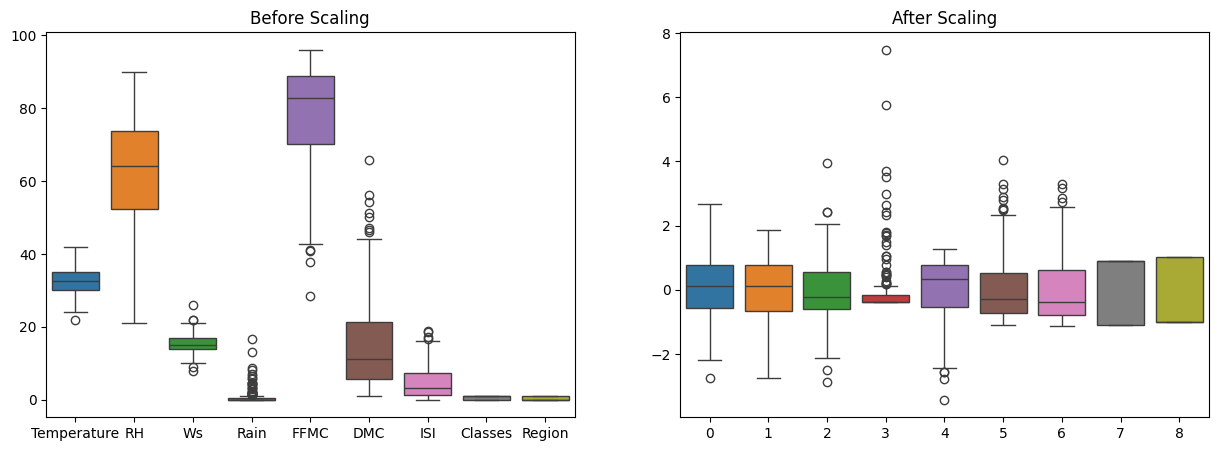

In [71]:
# ============================================================
# 6️⃣ Feature Scaling
# ============================================================

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#BOX PLOT TO UNDERSTAND EFFECT OF SCALING/ STANDARADIZATION
#after scaling sare train dataset ek hi range ke andr aa jate h jissse convergence krna bhut jyada easy ho jayega
# Visualize before and after scaling
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("Before Scaling")

plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("After Scaling")
plt.show()



In [74]:
# plt.figure(figsize=(15,5))
# plt.subplot(1,2,1)
# sns.boxplot(data=X_test)
# plt.title("Before Scaling")

# plt.subplot(1,2,2)
# sns.boxplot(data=X_test_scaled)
# plt.title("After Scaling")
# plt.show()

In [72]:
# ============================================================
# 7️⃣ Linear Regression
# ============================================================

linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

y_pred_lr = linreg.predict(X_test_scaled)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("\n🔹 Linear Regression Results:")
print("Mean Absolute Error:", mae_lr)
print("R2 Score:", r2_lr)


🔹 Linear Regression Results:
Mean Absolute Error: 0.5468236465249978
R2 Score: 0.9847657384266951


In [75]:
# ============================================================
# 8️⃣ Ridge Regression
# ============================================================
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score
ridge=Ridge()# by default alpha =1 hota h
ridge.fit(X_train_scaled,y_train)
y_pred_ridge=ridge.predict(X_test_scaled)

mae_ridge=mean_absolute_error(y_test, y_pred_ridge)
r2_ridge=r2_score(y_test,y_pred_lr)
print("\n🔹 Ridge Regression Results:")
print("Mean Absolute Error:", mae_ridge)
print("R2 Score:", r2_ridge)


🔹 Ridge Regression Results:
Mean Absolute Error: 0.5642305340105715
R2 Score: 0.9847657384266951


In [76]:
# ============================================================
# 9️⃣ Lasso Regression
# ============================================================
lasso = Lasso(alpha=0.001)
lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("\n🔹 Lasso Regression Results:")
print("Mean Absolute Error:", mae_lasso)
print("R2 Score:", r2_lasso)


🔹 Lasso Regression Results:
Mean Absolute Error: 0.5475806503410493
R2 Score: 0.9847416608942009


In [77]:
# ============================================================
# 🔟 ElasticNet Regression
# ============================================================

elastic = ElasticNet(alpha=0.001, l1_ratio=0.5)
elastic.fit(X_train_scaled, y_train)

y_pred_elastic = elastic.predict(X_test_scaled)

mae_elastic = mean_absolute_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)

print("\n🔹 ElasticNet Regression Results:")
print("Mean Absolute Error:", mae_elastic)
print("R2 Score:", r2_elastic)




🔹 ElasticNet Regression Results:
Mean Absolute Error: 0.548391324997332
R2 Score: 0.9847159105267689


C:\Users\sapps\AppData\Local\Temp\ipykernel_4884\1087000797.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=r2_scores, palette='coolwarm')


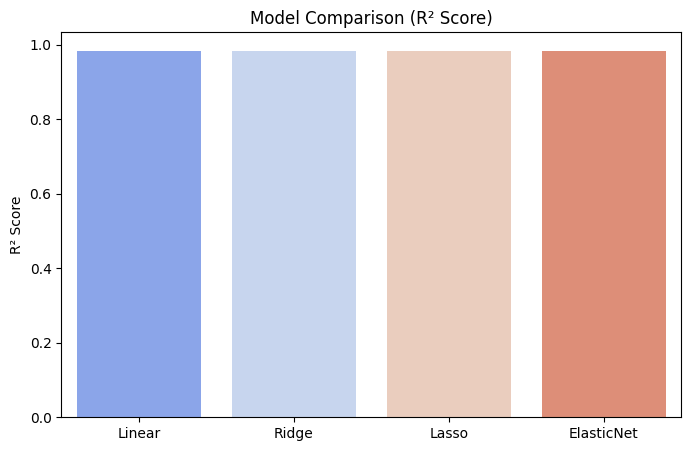

In [85]:
# ============================================================
# 1️⃣1️⃣ Model Comparison (Bar Plots)
# ============================================================

models = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']
mae_scores = [mae_lr, mae_ridge, mae_lasso, mae_elastic]
r2_scores = [r2_lr, r2_ridge, r2_lasso, r2_elastic]

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=r2_scores, palette='coolwarm')
plt.title("Model Comparison (R² Score)")
plt.ylabel("R² Score")
plt.show()



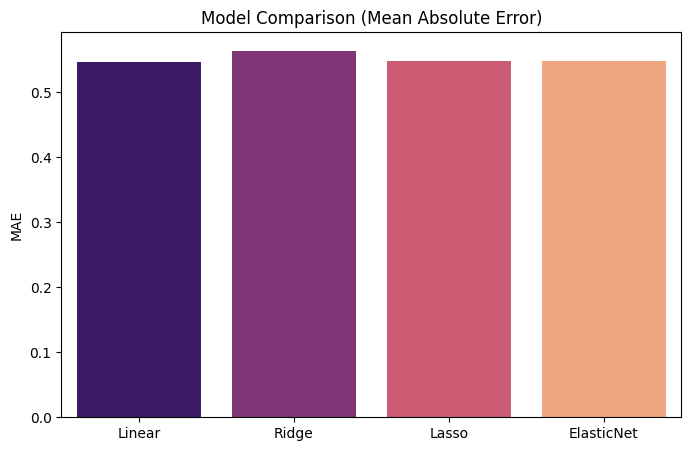

In [88]:
plt.figure(figsize=(8,5))
# sns.barplot(x=models, y=mae_scores, hue=models, palette='magma')
sns.barplot(x=models, y=mae_scores, hue=models, palette='magma', legend=False)# both work if we use palette then must use hue
plt.title("Model Comparison (Mean Absolute Error)")
plt.ylabel("MAE")
plt.show()

In [81]:
# ============================================================
# 1️⃣2️⃣ Summary Table
# ============================================================

summary = pd.DataFrame({
    'Model': models,
    'MAE': mae_scores,
    'R2_Score': r2_scores
})

print("\n📊 Model Performance Summary:")
print(summary)



📊 Model Performance Summary:
        Model       MAE  R2_Score
0      Linear  0.546824  0.984766
1       Ridge  0.564231  0.984766
2       Lasso  0.547581  0.984742
3  ElasticNet  0.548391  0.984716


In [82]:
# ============================================================
# ✅ End of Code
# ============================================================
print("\n✅ Model training and comparison completed successfully!")



✅ Model training and comparison completed successfully!


In [1]:
#why choose this ??? yha linear regression and ridge regression hi best h but linear regression may be do overfitting that why we choose ridge
# this pickle file is usedd for deployment
import pickle
pickle.dump('scaler',open('scaler.pkl','wb'))
pickle.dump('ridge',open('ridge.pkl','wb'))